<a href="https://colab.research.google.com/github/vaibhav251999/Email-campaign-effectiveness-prediction/blob/main/Vaibhav_Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    **- Email Campaign Effectiveness Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**Vaibhav Kumar Gupta
##### **Team Member 2 -**Bhavik verma
##### **Team Member 3 -**Priyanka pal
##### **Team Member 4 -**Dil kush sharma
##### **Team Member 5 -**Sayan somana

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/vaibhav251999/Email-campaign-effectiveness-prediction

# **Problem Statement**


**Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. Data columns are self-explanatory.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.8 MB/s 


In [3]:
# Import Libraries
#Importing important libraries and modules
#for data reading and manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

#reading the csv dataset
df = pd.read_csv("/content/drive/MyDrive/Almabetter/capstone projects/Email campaign effectiveness prediction/data_email_campaign.csv")

Mounted at /content/drive


### Dataset First View

In [5]:
# Dataset First Look
df.head(5)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(68353, 12)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


## **Dataset information** 
The data has the following features:
1. Email_ID - This column is basically the email ids of the individual users.
2. Email_type - This column contains 2 categories this is basically email type 1 and 2. It may be the types like promotional email and valid email or spam or not not spam.
3. Subject_Hotness_Score - This column basically is the subject-line effectiveness score.
4. Email_Source -This column represents the source of the email like sales,marketing or product type email.
5. Email_Campaign_Type - This column represents Campaign type
6. Total_Past_Communications - This column contains the previous mails from the source.
7. Customer_Location - This is a Categorical type of data which contains 6 categories which explains the different demographic location of the customers.
8. Time_Email_sent_Category -This is a Categorical type of data It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.
9. Word_Count -This column contains the no.of words in the mail.
10. Total_Links -This column contains Total links in the email body.
11. Total_Images -This column contains The banner images in the email body.
12. Email_Status -This column contains is the target variable which contains the characterization of the mail that is **ignored ; read**; acknowledged by the reader.

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f'we have {len(df[df.duplicated()])} duplicate values')

we have 0 duplicate values


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [10]:
# Visualizing the missing values

### What did you know about your dataset?

Dataset has 12 attributes and 68353 rows

among the 12 atributes 6 are categorical
1.  email_type
2.  email_source_type
3.  costomer_location
4.  email_campaign_type
5.  time_email_sent_category
6.  email_status

rest others are continuous

we have null values in costomer_location ,total_past_communications ,total_links and total_images


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description 

1.   Email_source, email_type are mostly contains 1 as min value , 25th and 50th percentiles values are 1 only so it might be possitively skewed


2.   Also the total_images and email_status have mostly 0 values as min and 25th and 50th percentile values are 0


3.   Time_email_sent_category contains mainly 2 that is evening time

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

Email_ID                     68353
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total_Past_Communications       64
Time_Email_sent_Category         3
Word_Count                     151
Total_Links                     37
Total_Images                    45
Email_Status                     3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df.drop(['Email_ID'],axis=1,inplace=True)

### What all manipulations have you done and insights you found?

As Email_ID contain all unique values so it would not be required for further analysis and prediction.Now the Dataset is ready for the Analysis 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [15]:
# code for showing bar percentage
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
     


#### Chart - 1

In [16]:
df.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

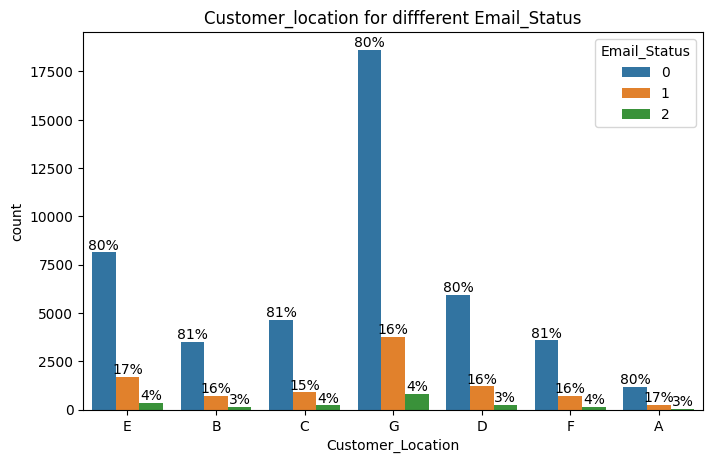

In [17]:
# Chart - 1 visualization code

ax=sns.countplot(df['Customer_Location'],hue=df["Email_Status"])
plt.title('Customer_location for diffferent Email_Status')
barPerc(df,'Customer_Location',ax)


##### 1. Why did you pick the specific chart?

This is reqquired for the analysis for categorical data.

##### 2. What is/are the insight(s) found from the chart?

**Customer_Location conatins highly G values and we can see that it is not making any impact on the dependent variable as the ratio is same.
So we can drop the this Customer_Location column**

#### Chart - 2

Text(0.5, 1.0, 'Total_Past_Communications Distribution')

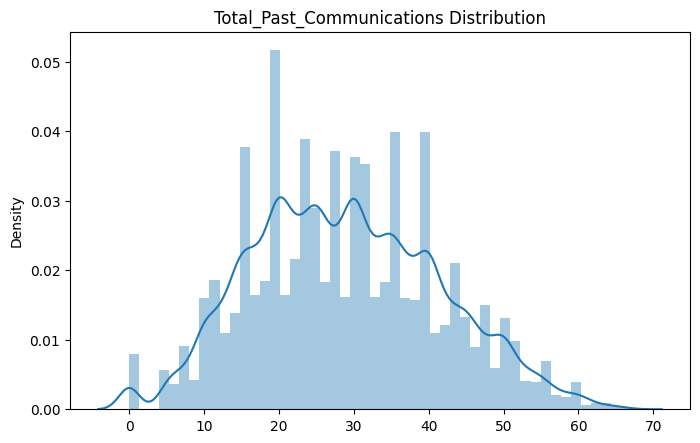

In [18]:
# Chart - 2 visualization code
sns.distplot(x=df['Total_Past_Communications'], hist = True)
plt.title('Total_Past_Communications Distribution')

##### 1. Why did you pick the specific chart?

To see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill the null values accordingly.

##### 2. What is/are the insight(s) found from the chart?

Total_past_communications seems to normaly distributed mostly vales lies between 25 to 35

#### Chart - 3

Text(0.5, 1.0, 'Total_Links Distribution')

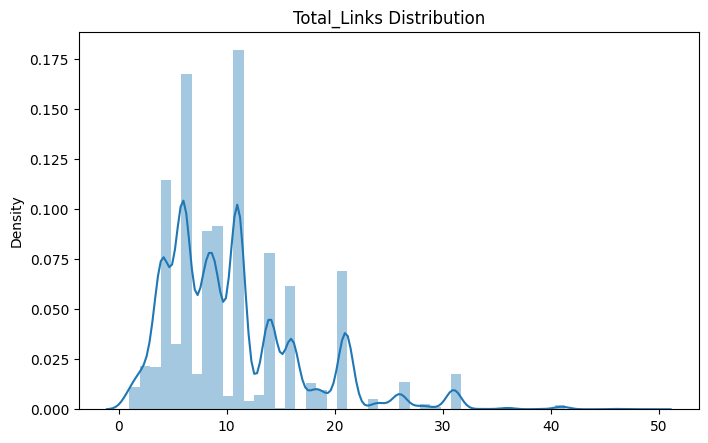

In [19]:
# Chart - 3 visualization code
sns.distplot(x=df['Total_Links'], hist= True)
plt.title('Total_Links Distribution')

##### 1. Why did you pick the specific chart?

To see the distribution of Total Links to get what majority of the data tends to so that we can fill the null values accordingly..

##### 2. What is/are the insight(s) found from the chart?

It is more or less postively skewed and contain vales ranges between  to 12

#### Chart - 4

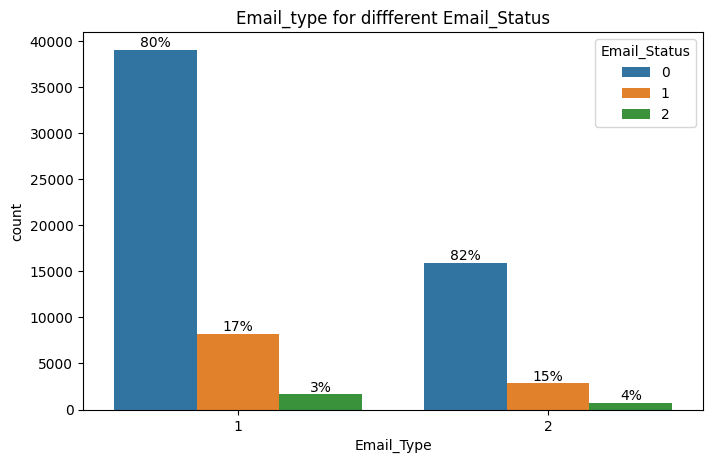

In [20]:
# Chart - 4 visualization code
ax=sns.countplot(x=df['Email_Type'],hue=df["Email_Status"])
plt.title('Email_type for diffferent Email_Status')
barPerc(df,'Email_Type',ax)


##### 1. Why did you pick the specific chart?

**To do analysis of Email_type,countplot will give the category wise count in a fugure**

##### 2. What is/are the insight(s) found from the chart?

**there are more promotional emails than important emails i.e there are more 1s than 2s**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**As we can see from the plot that the relation of Email_type with Email_status is not so stron as the ration being approximately same in each category**

#### Chart - 5

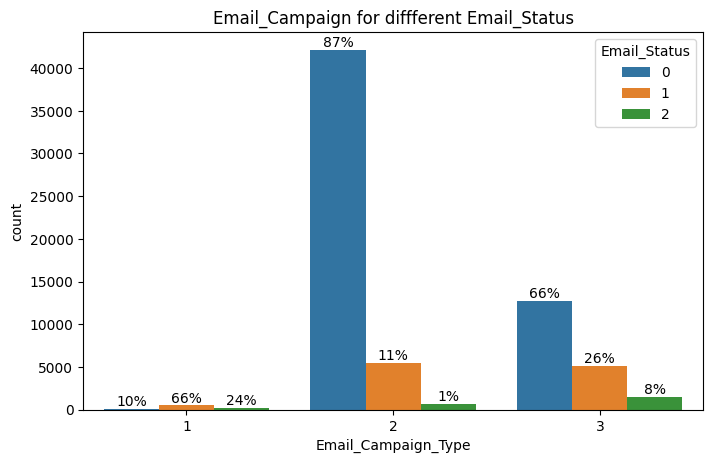

In [21]:
# Chart - 5 visualization code
ax=sns.countplot(df['Email_Campaign_Type'],hue=df["Email_Status"])
plt.title('Email_Campaign for diffferent Email_Status')
barPerc(df,'Email_Campaign_Type',ax)


##### 1. Why did you pick the specific chart?

**To study the analysis of distribution of Email_Campaign_Type**

##### 2. What is/are the insight(s) found from the chart?





**For email_campaign_type 1 there are more 2nd category of email_status which is uneven as generally Email_Status 1 category is maximum in rest other categories**

#### Chart - 6

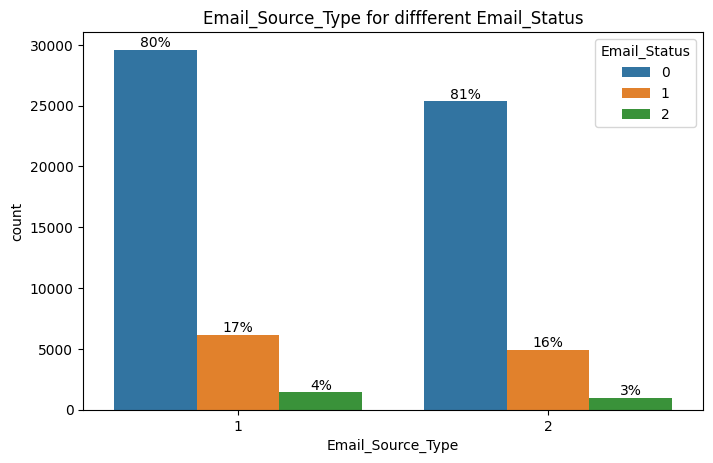

In [22]:
# Chart - 6 visualization code
ax=sns.countplot(df['Email_Source_Type'],hue=df["Email_Status"])
plt.title('Email_Source_Type for diffferent Email_Status')
barPerc(df,'Email_Source_Type',ax)


##### 1. Why did you pick the specific chart?

**To analyse the Email_Source_Type**

##### 2. What is/are the insight(s) found from the chart?

**this seems totaly normal , equaly distributed categories counts also it is present in more or less in same ratio of categories of Email_Status . It is not much related to Email_Status so we can drop this coulmn**

#### Chart - 7

Text(0.5, 1.0, 'Word_count Distribution')

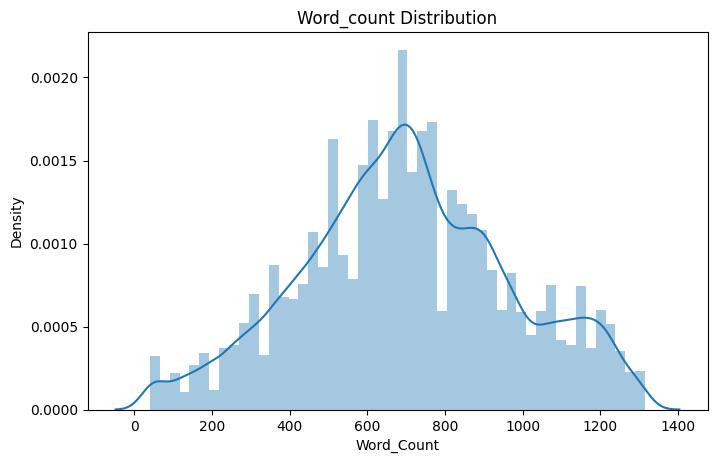

In [23]:
# Chart - 7 visualization code
sns.distplot(df['Word_Count'],hist=True)
plt.title('Word_count Distribution')

##### 1. Why did you pick the specific chart?

To study the Word_Count distribution

##### 2. What is/are the insight(s) found from the chart?

More kind normaly distributed with average values arround 600-800

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In [24]:
df.groupby(['Email_Status'])['Word_Count'].mean().reset_index()

,Email_Status,Word_Count
0,0,725.256785
1,1,590.939578
2,2,620.615255


We can see that most of the values for Word_count which are ignored(0) are conatain large word counts

*   longer emails no one like to read

#### Chart - 8

Text(0.5, 1.0, 'Total Images Distribution')

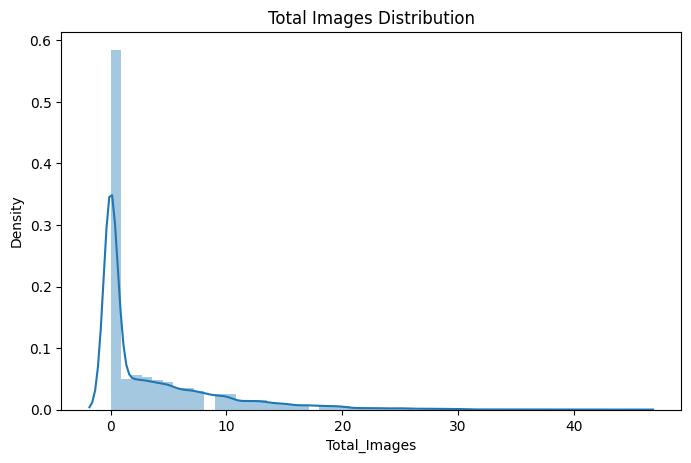

In [25]:
# Chart - 8 visualization code
sns.distplot(df['Total_Images'])
plt.title('Total Images Distribution')

##### 1. Why did you pick the specific chart?

To study the distribution of Total_Images

##### 2. What is/are the insight(s) found from the chart?

Total_images is poitively skewed as maximum emails contain less number of images

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In [26]:
df.groupby(['Email_Status'])['Total_Images'].mean().reset_index()

,Email_Status,Total_Images
0,0,3.617575
1,1,3.187361
2,2,3.690415


There is not much relation among the Total_images and Email_Status

#### Chart - 9

Text(0.5, 1.0, 'Subject_Hotness_score Distribution')

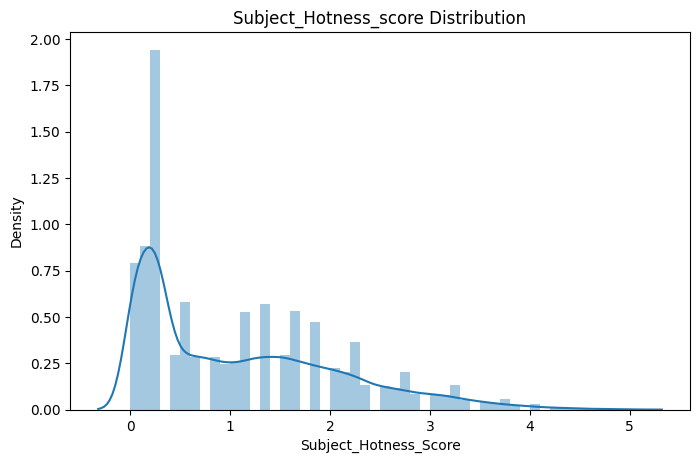

In [27]:
# Chart - 9 visualization code
sns.distplot(df['Subject_Hotness_Score'])
plt.title('Subject_Hotness_score Distribution')

##### 1. Why did you pick the specific chart?

To study the distribution of Subject_Hotness_score

##### 2. What is/are the insight(s) found from the chart?

It is kind of positively skewed i.e most of the subject_hotness_score of the emails are low

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In [28]:
df.groupby(['Email_Status'])['Subject_Hotness_Score'].median().reset_index()

,Email_Status,Subject_Hotness_Score
0,0,1.0
1,1,0.3
2,2,0.2


Most of the emails which are ignored have high Subject_Hotness_Score

#### Chart - 10

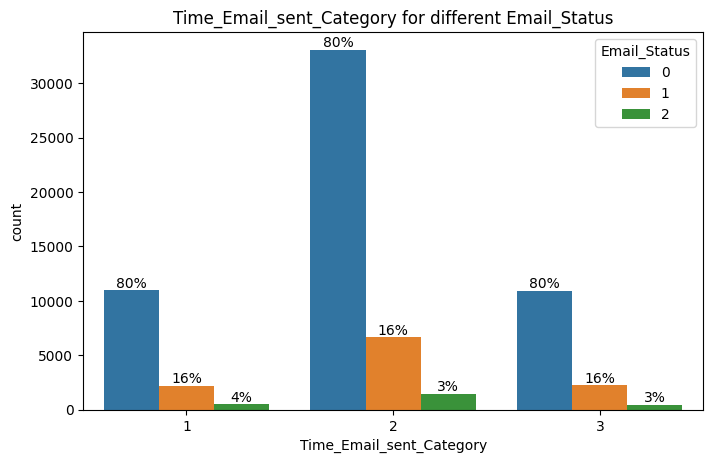

In [29]:
# Chart - 10 visualization code
ax=sns.countplot(df['Time_Email_sent_Category'],hue=df['Email_Status'])
plt.title('Time_Email_sent_Category for different Email_Status')
barPerc(df,'Time_Email_sent_Category',ax)


##### 1. Why did you pick the specific chart?


**To study the time_email_sent_category for diffferent email_status and also the distribution of Time_email_sent_category**

##### 2. What is/are the insight(s) found from the chart?

**most of the emails are sent in the evening time**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**This does not seems to very related with email_satus , the ratio seems to be same for each category so we can drop this column**

#### Chart - 11

Text(0.5, 1.0, 'Email_satus distribution')

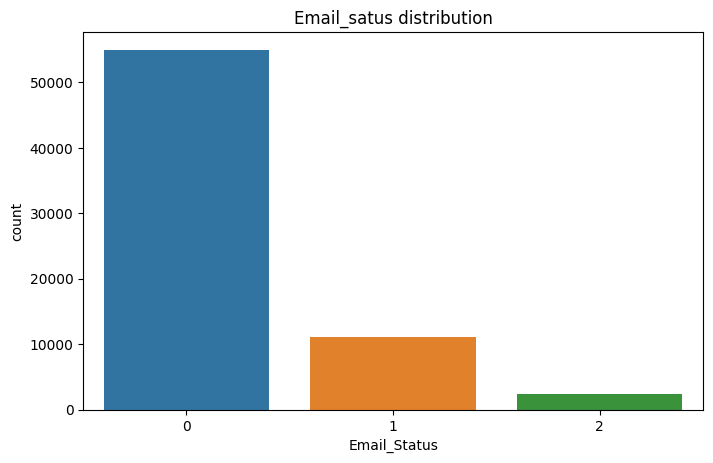

In [30]:
# Chart - 11 visualization code
# analyis of dependent variable
sns.countplot(df['Email_Status'])
plt.title('Email_satus distribution')

##### 1. Why did you pick the specific chart?

**To study the distribution of dependent variable i.e Email_Status**

##### 2. What is/are the insight(s) found from the chart?

**Clearly we can see that it is unballanced  with most values as 0 .And very less numer of 1 and 2s in the values**

#### Chart - 12

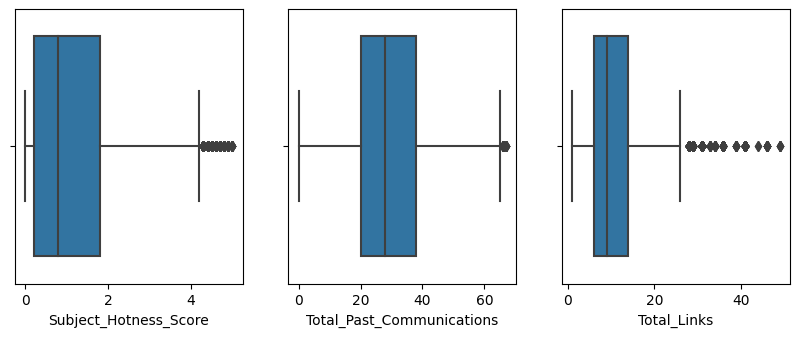

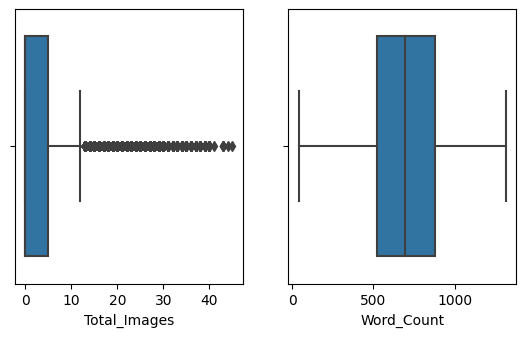

In [31]:
# Chart - 12 visualization code
df_num = df.select_dtypes(include =['float']).copy()
df_num['Word_Count'] = df.loc[df_num.index, 'Word_Count'].copy()
idx = 1
fig = plt.figure(figsize = (10,8))
for col in list(df_num.columns):
    if idx <= 3:
            ax1 = fig.add_subplot(2,3,idx)
            sns.boxplot(data = df_num, x=col, ax = ax1)
            
    idx = idx +1
    if idx == 4: 
        fig = plt.figure(figsize = (10,8))
        idx =1

##### 1. Why did you pick the specific chart?

To analyse the outliers in the numerical variable

##### 2. What is/are the insight(s) found from the chart?

Total_images,subject_hotness_score and total_links have outliers

#### Chart - 14 - Correlation Heatmap

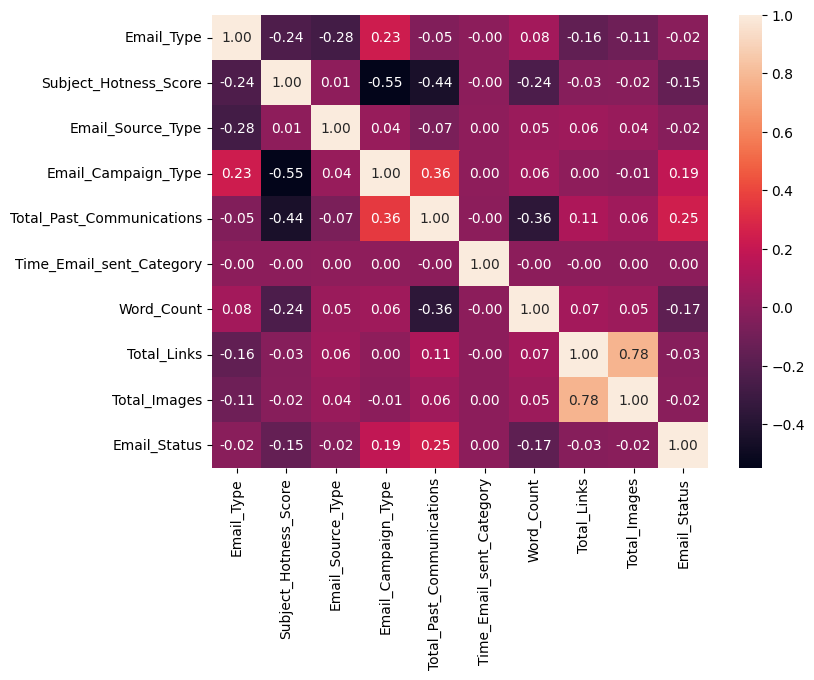

In [32]:
# Correlation Heatmap visualization code
# heatmap for the continous variables  in order to understand the relationship with dependent variable
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

##### 1. Why did you pick the specific chart?

To study the correlation between the variables

##### 2. What is/are the insight(s) found from the chart?

*   Total_Images and Total links are multicorrelated with values 0.78 
*   subject_hotness_score and word_counts are negetively correlated with the dependent_variable Email_Status
*   Email_campaign_type and Total_past_communications are possitvely correlated to dependent variable Email_Status

#### Chart - 15 - Pair Plot 

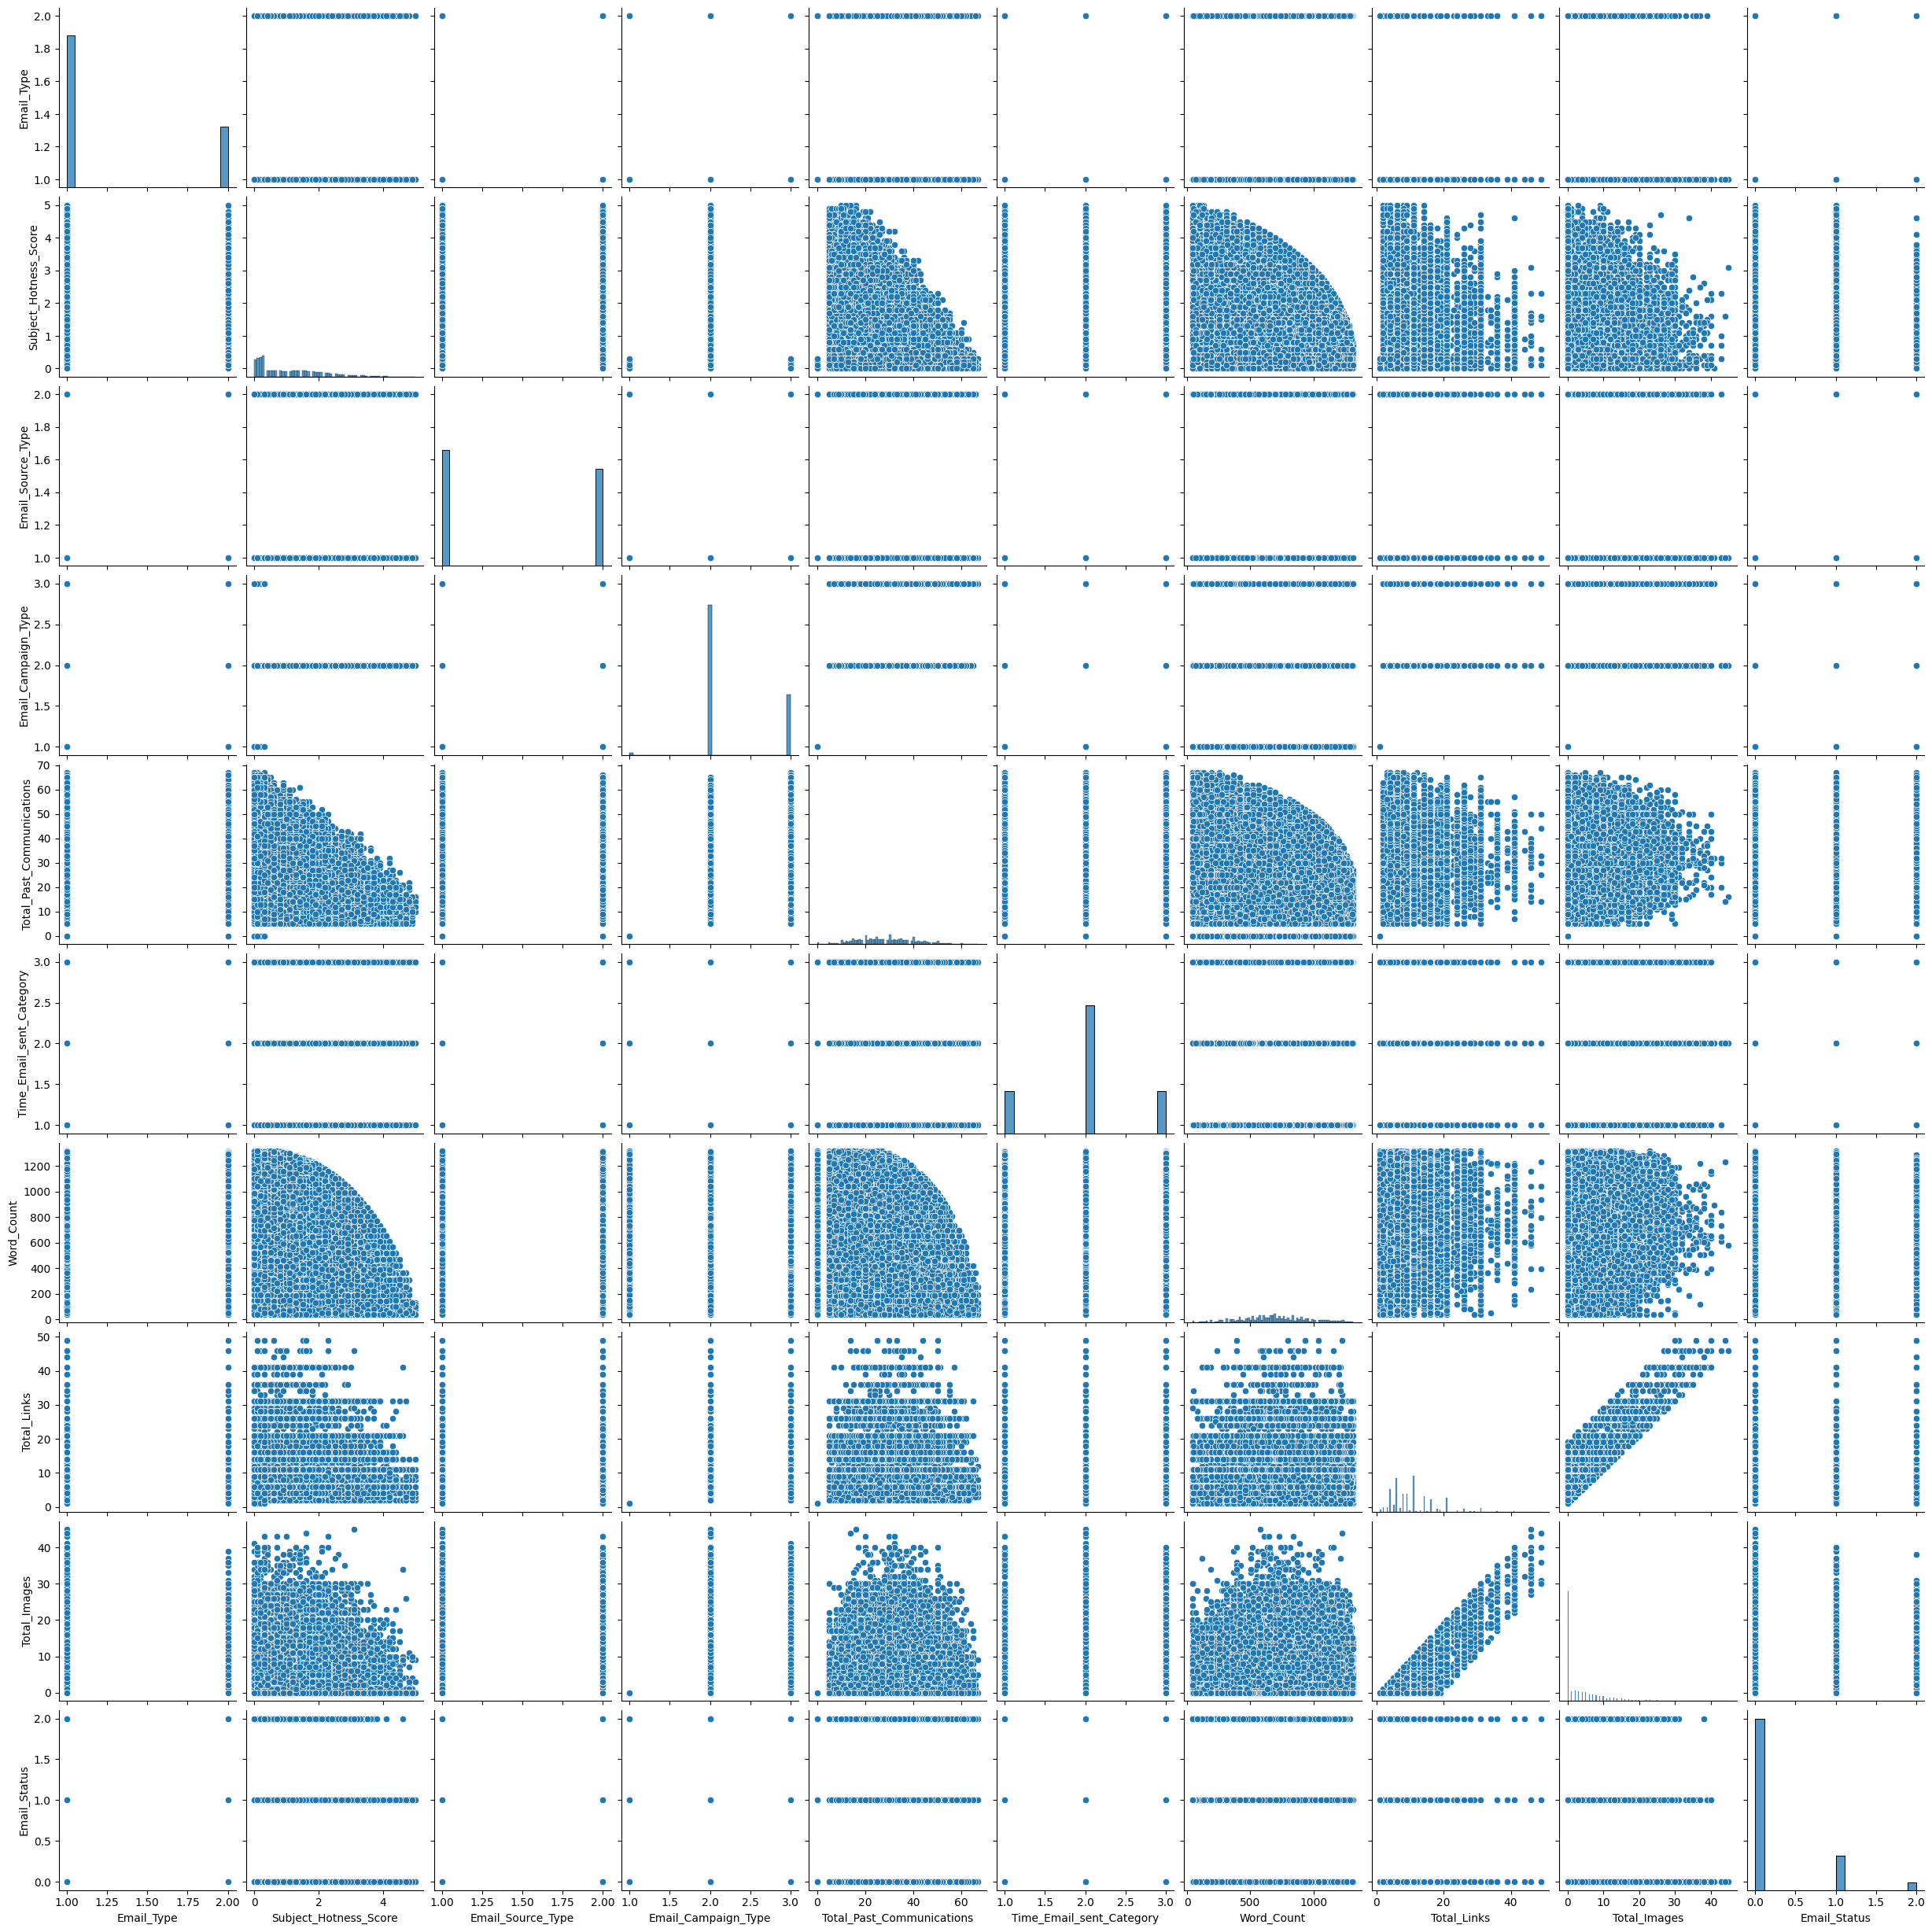

In [33]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

**To study the realtion of relationship between variables**

##### 2. What is/are the insight(s) found from the chart?

Total_links and Total_Images are multicorelated

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Missing values were found in the columns



*   `Customer_Locattion`
*   `Total_past_Communications`
*   `Total_links`
*   `Total_Images`



As Customer_Location is not much related with email_Status so we are gona drop this column

In [37]:
df.drop('Customer_Location',inplace=True,axis=1)

In [38]:
# Handling Missing Values & Missing Value Imputation
df['Total_Links'].fillna(df['Total_Links'].mode()[0],inplace=True)
df['Total_Images'].fillna(df['Total_Images'].mode()[0],inplace=True)
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].median(),inplace=True)
df.isnull().sum()


Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

*  Imputing the missing values for the categorical data with Mode
*  Imputing the missing values for the continuous data having outliers with the mdeian value as mdeian is roboust with outliers

### 2. Handling Outliers

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Links': {0: 1374, 1: 183, 2: 51}, 'Total_Images': {0: 4680, 1: 697, 2: 208}}


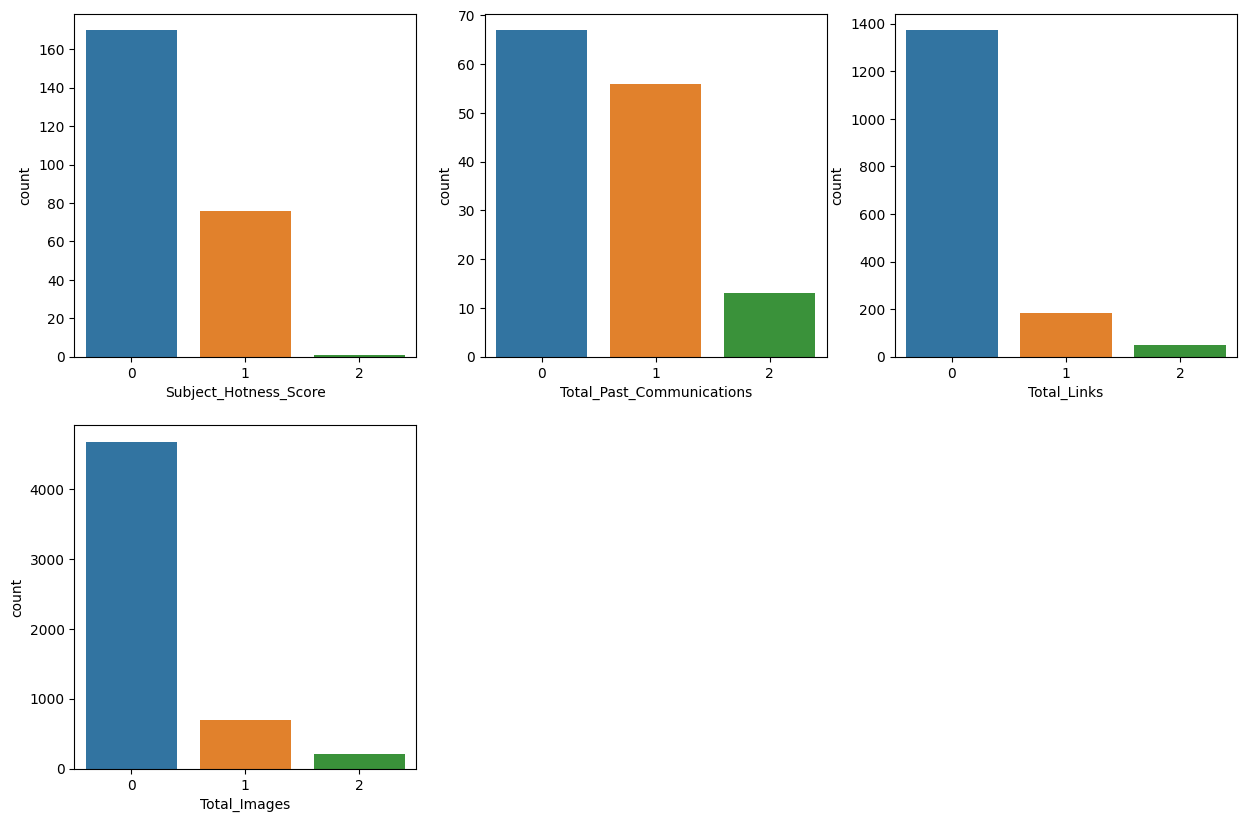

In [39]:
# Handling Outliers & Outlier treatments

col_to_treat=['Subject_Hotness_Score','Total_Past_Communications','Total_Links','Total_Images']

fig = plt.figure(figsize = (15,10))
idx = 1
 
d={}
#iterating through each column which have outliers
for x in [y for y in col_to_treat]:
    #Finding Quartile
    Q3,Q1 = np.percentile(df.loc[:,x],[75,25])
    #Calculating Inter Quartile Range
    IQR = Q3-Q1
    #Fixing Boundaries for outliers
    max = Q3+(1.5*IQR)
    min = Q1-(1.5*IQR)
    
    #list y to store email_status of only outliers
    y=[]
    y=df.loc[df[x] < min]['Email_Status'].tolist()
    y.append(df.loc[df[x] > max]['Email_Status'].tolist()) 
    d[x]={}
    for i in y[0]:
      d[x][i] = d[x].get(i,0) + 1
    ax1 = fig.add_subplot(2,3,idx)
    sns.countplot(y[0],ax=ax1)
    plt.xlabel(x)      
    idx = idx +1
print(d)
  

In [58]:
minority_sum=0
majority_sum=0
for col in col_to_treat:
  minority_sum+=d[col][1]
  minority_sum+=d[col][2]
  majority_sum+=d[col][0]

total_for_1=df.groupby('Email_Status').count()['Email_Type'][1] 
total_for_2=df.groupby('Email_Status').count()['Email_Type'][2]

total_for_minor=total_for_1+ total_for_2
total_for_majority=df.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*majority_sum/total_for_majority)
print("Percentage of minority class having outliers = ",100*minority_sum/total_for_minor)

Percentage of majority class having outliers =  11.450465044320271
Percentage of minority class having outliers =  9.580972263644497


##### What all outlier treatment techniques have you used and why did you use those techniques?

The outliers are removed if we found that droping the outliers values wouldnt affect the minority class i.e Email_Status values 1 and 2 , here the majority class is Email_Status value 0 
*  As the percentage of data will be lossed if we drop the outliers is more than 5% for minority class .**So we will not drop the outliers**

### 3. Categorical Encoding

In [59]:
df.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [60]:
# Encode your categorical columns
categorical=['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

df = pd.get_dummies(df,columns=categorical,drop_first=True)
df.head(3)


,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Email_Type_2,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,2.2,33.0,440,8.0,0.0,0,0,1,1,0,0,0
1,2.1,15.0,504,5.0,0.0,0,1,0,1,0,1,0
2,0.1,36.0,962,5.0,0.0,1,1,0,0,1,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical  techniues that is used for  categorical encoding is dummification with k-1 variables to be safe from dummy trap 

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

**As we know that total_links and total _images are multicorelated 
so we can construct feature based on both the variables, Since droping anyone variable is ambiguous as they have approximately same effects on the dependent variable**

In [61]:
# Manipulate Features to minimize feature correlation and create new features
# as we know that total_links and total _images are multicorelated 
# so we can construct feature based on both as droping anyone variable is ambiguous as they have approximately same effects on the dependent variable

df['email_attchments']=df['Total_Images'] + df['Total_Links']

#### 2. Feature Selection

In [63]:
df.columns

Index(['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count',
       'Total_Links', 'Total_Images', 'Email_Status', 'Email_Type_2',
       'Email_Source_Type_2', 'Email_Campaign_Type_2', 'Email_Campaign_Type_3',
       'Time_Email_sent_Category_2', 'Time_Email_sent_Category_3',
       'email_attchments'],
      dtype='object')

In [64]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import chi2
p_val_f_val=chi2(df.drop('Email_Status',axis=1),df['Email_Status'])
p_val_f_val

(array([1.36579326e+03, 1.89292069e+04, 2.59026873e+05, 3.91608941e+02,
        4.87242798e+02, 3.92069627e+01, 2.38369041e+01, 1.54584125e+03,
        2.75522291e+03, 6.59315342e-02, 8.20735357e-01, 7.89795712e+02]),
 array([2.64096441e-297, 0.00000000e+000, 0.00000000e+000, 9.18753206e-086,
        1.57242820e-106, 3.06419371e-009, 6.66625672e-006, 0.00000000e+000,
        0.00000000e+000, 9.67571682e-001, 6.63406285e-001, 3.14804050e-172]))

In [65]:
p_val=pd.Series(p_val_f_val[1])
p_val.index=df.drop('Email_Status',axis=1).columns
p_val.sort_index(ascending=False)

email_attchments              3.148041e-172
Word_Count                     0.000000e+00
Total_Past_Communications      0.000000e+00
Total_Links                    9.187532e-86
Total_Images                  1.572428e-106
Time_Email_sent_Category_3     6.634063e-01
Time_Email_sent_Category_2     9.675717e-01
Subject_Hotness_Score         2.640964e-297
Email_Type_2                   3.064194e-09
Email_Source_Type_2            6.666257e-06
Email_Campaign_Type_3          0.000000e+00
Email_Campaign_Type_2          0.000000e+00
dtype: float64

**Using Mutual Information Gain method to select features**

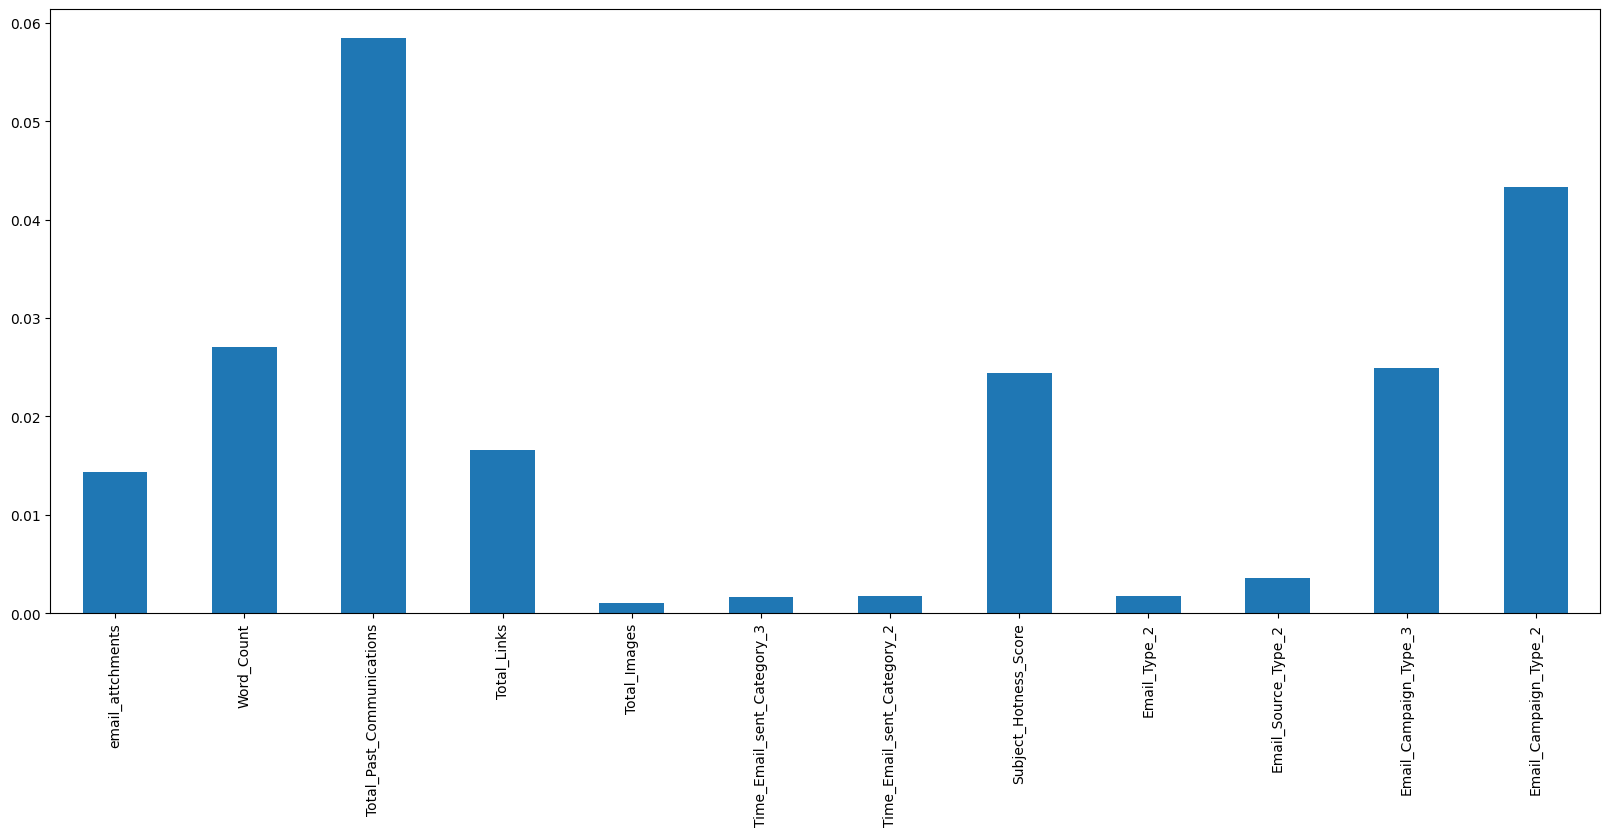

In [68]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_gain=mutual_info_classif(df.drop('Email_Status',axis=1),df['Email_Status'])
mutual_info_gain=pd.Series(mutual_info_gain)
mutual_info_gain.index=df.drop('Email_Status',axis=1).columns
mutual_info_gain.sort_index(ascending=False).plot.bar(figsize=(20,8))

##### What all feature selection methods have you used  and why?

**Using chi Square method  , the lesser the p_values are ,higher will be the importance**

**Mutual Information gain method is also used higher the values off mutual_info_gain higher is the importance** 



*   **based on all this techniues we selected our features as ,Word_count**

1. email_attachments
2. Total_Past_Communications
3. Subject_Hotness_Score
4. Email_source_type
5. Email_Campaign_Type
6. Word_Count



*   **we would like to drop**
1. Total_Images
2. Total_links
3. Time_Email_sent_Category 
4. Email_Type




In [70]:
drop=['Email_Type_2','Time_Email_sent_Category_2','Time_Email_sent_Category_3','Total_Images','Total_Links']
df.drop(drop,inplace=True,axis=1)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Not required 

In [43]:
# Transform Your data

### 6. Data Scaling

In [73]:
# Scaling your data
numerical_column=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','email_attchments']
for col in numerical_column:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df.head(3)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,email_attchments
0,0.44,0.492537,0.313480,0,1,1,0,0.076087
1,0.42,0.223881,0.363636,0,0,1,0,0.043478
2,0.02,0.537313,0.722571,1,0,0,1,0.043478


##### Which method have you used to scale you data and why?


*  **Normalization technique Min - Max Scalling** is applied here as it scales the data between 0 to 1 it would scale down the different facotor ranges to 0 to 1 so that they all have equal importance during the Weight Updation

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**For this problem dimensionality reduction is not required as we dont have much dimension**

In [45]:
# DImensionality Reduction (If needed)

### 8. Data Splitting

In [46]:
# Split your data to train and test. Choose Splitting ratio wisely.

X=df.drop('Email_Status',axis=1)
y=df['Email_Status']

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**Upsampling is required as our data is highly unbalanced**
*   **As we have 3 categories of dependent variable among which class 0 is high and other two classes are very less**

In [47]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [48]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [49]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [50]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [51]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [52]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [53]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [54]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [55]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [56]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [57]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***